Project Title: Bio-Fertilizer Recommendation System for Sustainable Agriculture

Problem Statement: The overuse of chemical fertilizers in agriculture has resulted in high farming expenses, water contamination, and soil damage.  Farmers frequently abuse fertilizer and degrade soil health because they are not properly guided on which fertilizer is best for certain crops, soil, and seasonal conditions.  Compost, manure, and vermicompost are examples of biofertilizers that provide a sustainable substitute; nevertheless, there is no straightforward method for recommending them.  In order to assist farmers use less chemicals, save money, and implement sustainable farming methods, an AI-powered recommendation system is required to identify appropriate bio-fertilizers.

Project Description: This project focuses on developing an AI-powered Bio-Fertilizer Recommendation System to promote sustainable agriculture. The system takes input parameters such as soil nutrients (N, P, K, pH, etc.), crop type, and seasonal conditions, and then applies machine learning techniques to recommend the most suitable bio-fertilizer (e.g., compost, manure, vermicompost, Rhizobium).

The workflow of the project includes data preprocessing, feature encoding, and model training using classification algorithms like Random Forest. The model is trained on a modified crop–fertilizer dataset, where chemical fertilizers are mapped to bio-fertilizer equivalents. A simple Streamlit-based web application is also developed, allowing users to enter crop and soil details and instantly receive fertilizer recommendations.

By guiding farmers towards bio-fertilizer use, this project aims to reduce dependence on chemical inputs, improve soil fertility, lower farming costs, and promote eco-friendly farming practices, aligning with the vision of green skills and sustainable agriculture.

In [1]:
# Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE


In [2]:
crop_df = pd.read_csv(
    r"C:\Users\DELL\Desktop\AiMl\AICT intenship\Crop-and-Fertilizer-Recommendation-System-main\Datasets\Crop_recommendation.csv"
)

fert_df = pd.read_csv(
    r"C:\Users\DELL\Desktop\AiMl\AICT intenship\Crop-and-Fertilizer-Recommendation-System-main\Datasets\fertilizer.csv",
    encoding='latin1'
)

print("Crop Dataset Shape:", crop_df.shape)
print("Fertilizer Dataset Shape:", fert_df.shape)

Crop Dataset Shape: (2200, 8)
Fertilizer Dataset Shape: (154, 4)


Biofertilizer Mapping

In [3]:
crop_to_biofert = {
    "rice": "Compost",
    "wheat": "Vermicompost",
    "maize": "Farmyard Manure",
    "millet": "Rhizobium",
    "barley": "Azospirillum",
    "sugarcane": "Farmyard Manure",
    "cotton": "Vermicompost",
    "pulses": "Rhizobium",
    "oilseeds": "Compost",
    "fruits": "Vermicompost",
    "vegetables": "Compost",
    "coffee": "Farmyard Manure",
    "tea": "Azospirillum",
    "chickpea": "Rhizobium",
    "kidneybeans": "Rhizobium",
    "pigeonpeas": "Rhizobium",
    "mothbeans": "Rhizobium",
    "mungbean": "Rhizobium",
    "blackgram": "Rhizobium",
    "lentil": "Rhizobium",
    "pomegranate": "Compost",
    "banana": "Compost",
    "mango": "Farmyard Manure",
    "grapes": "Vermicompost",
    "watermelon": "Compost",
    "muskmelon": "Compost",
    "apple": "Compost",
    "orange": "Compost",
    "papaya": "Compost",
    "coconut": "Farmyard Manure",
    "jute": "Vermicompost"
}


Prepare Dataset

In [4]:
data = crop_df.copy()
if 'label' in data.columns:
    data["BioFertilizer"] = data["label"].map(crop_to_biofert)
    data["BioFertilizer"] = data["BioFertilizer"].fillna("Compost")
else:
    data["BioFertilizer"] = "Compost"

print("Prepared Dataset Shape:", data.shape)
print("\nOriginal Crop Distribution:\n", data["label"].value_counts())


Prepared Dataset Shape: (2200, 9)

Original Crop Distribution:
 label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


Feature Engineering

In [5]:
if all(col in data.columns for col in ["N", "P", "K"]):
    data["N_to_P"] = data["N"] / (data["P"] + 1)
    data["N_to_K"] = data["N"] / (data["K"] + 1)
    data["P_to_K"] = data["P"] / (data["K"] + 1)

X = data.drop(columns=["label", "BioFertilizer"], errors="ignore")
X = X.select_dtypes(include=[np.number])
y = data["label"]  # Crop prediction


SMOTE stands for Synthetic Minority Over-sampling Technique. It’s a technique used in machine learning to balance imbalanced datasets, especially in classification problems.

Scaling + Encoding

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("\nClass distribution before SMOTE:\n", pd.Series(y).value_counts())



Class distribution before SMOTE:
 label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


Balance Dataset with SMOTE

In [7]:
smote = SMOTE(random_state=42)
X_res, y_res_encoded = smote.fit_resample(X_scaled, y_encoded)

unique, counts = np.unique(y_res_encoded, return_counts=True)
print("\nClass distribution after SMOTE:\n", dict(zip(le.inverse_transform(unique), counts)))



Class distribution after SMOTE:
 {'apple': np.int64(100), 'banana': np.int64(100), 'blackgram': np.int64(100), 'chickpea': np.int64(100), 'coconut': np.int64(100), 'coffee': np.int64(100), 'cotton': np.int64(100), 'grapes': np.int64(100), 'jute': np.int64(100), 'kidneybeans': np.int64(100), 'lentil': np.int64(100), 'maize': np.int64(100), 'mango': np.int64(100), 'mothbeans': np.int64(100), 'mungbean': np.int64(100), 'muskmelon': np.int64(100), 'orange': np.int64(100), 'papaya': np.int64(100), 'pigeonpeas': np.int64(100), 'pomegranate': np.int64(100), 'rice': np.int64(100), 'watermelon': np.int64(100)}


Train-Test Split

In [8]:
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X_res, y_res_encoded, test_size=0.2, random_state=42, stratify=y_res_encoded
)


In [9]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train_encoded)

best_model = grid.best_estimator_


Evaluate Model


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 99.32%

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00

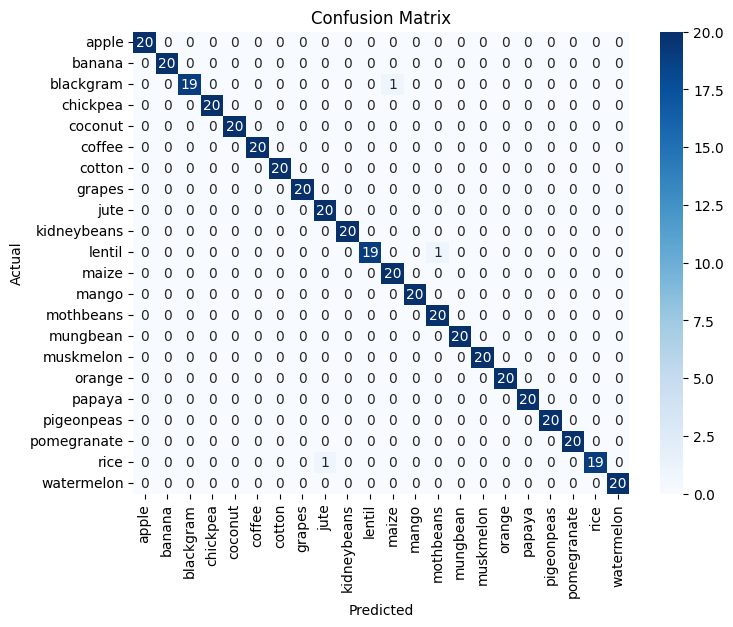

In [10]:
y_pred_encoded = best_model.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)
y_test = le.inverse_transform(y_test_encoded)

print("\nBest Parameters:", grid.best_params_)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
def predict_crop_and_biofertilizer(input_features_scaled):
    crop_encoded = best_model.predict(input_features_scaled)[0]
    crop_pred = le.inverse_transform([crop_encoded])[0]
    bio_pred = crop_to_biofert.get(crop_pred, "Compost")
    
    dosage_dict = {
        "Compost": 200,
        "Vermicompost": 150,
        "Farmyard Manure": 180,
        "Rhizobium": 100,
        "Azospirillum": 120
    }
    dosage = dosage_dict.get(bio_pred, 150)
    return crop_pred, bio_pred, dosage


In [ ]:
test_cases = [
    {"N": 90, "P": 42, "K": 43, "temperature": 26, "humidity": 80, "ph": 6.5, "rainfall": 200},
    {"N": 110, "P": 50, "K": 45, "temperature": 18, "humidity": 60, "ph": 6.8, "rainfall": 100},
    {"N": 70, "P": 30, "K": 40, "temperature": 28, "humidity": 75, "ph": 6.2, "rainfall": 150},
    {"N": 55, "P": 25, "K": 30, "temperature": 15, "humidity": 55, "ph": 6.0, "rainfall": 85},
    {"N": 120, "P": 60, "K": 55, "temperature": 30, "humidity": 70, "ph": 7.0, "rainfall": 250}
]

print("\n========== Test Predictions ==========")
for case in test_cases:
    N, P, K, temp, hum, ph_val, rain = case.values()
    N_to_P = N / (P + 1)
    N_to_K = N / (K + 1)
    P_to_K = P / (K + 1)
    
    user_input = pd.DataFrame(
        [[N, P, K, temp, hum, ph_val, rain, N_to_P, N_to_K, P_to_K]],
        columns=X.columns
    )
    user_input_scaled = scaler.transform(user_input)
    
    crop_pred, bio_pred, dosage_pred = predict_crop_and_biofertilizer(user_input_scaled)
    print("\nInput:", case)
    print("Recommended Bio-Fertilizer:", bio_pred, "| Dosage:", dosage_pred)



========== Test Predictions ==========

Input: {'N': 90, 'P': 42, 'K': 43, 'temperature': 26, 'humidity': 80, 'ph': 6.5, 'rainfall': 200}
Predicted Crop: rice
Recommended Bio-Fertilizer: Compost | Dosage: 200

Input: {'N': 110, 'P': 50, 'K': 45, 'temperature': 18, 'humidity': 60, 'ph': 6.8, 'rainfall': 100}
Predicted Crop: coffee
Recommended Bio-Fertilizer: Farmyard Manure | Dosage: 180

Input: {'N': 70, 'P': 30, 'K': 40, 'temperature': 28, 'humidity': 75, 'ph': 6.2, 'rainfall': 150}
Predicted Crop: jute
Recommended Bio-Fertilizer: Vermicompost | Dosage: 150

Input: {'N': 55, 'P': 25, 'K': 30, 'temperature': 15, 'humidity': 55, 'ph': 6.0, 'rainfall': 85}
Predicted Crop: mango
Recommended Bio-Fertilizer: Farmyard Manure | Dosage: 180

Input: {'N': 120, 'P': 60, 'K': 55, 'temperature': 30, 'humidity': 70, 'ph': 7.0, 'rainfall': 250}
Predicted Crop: coffee
Recommended Bio-Fertilizer: Farmyard Manure | Dosage: 180


In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder

with open("le.pkl", "wb") as f:
    pickle.dump(le, f)

with open("rf_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
